In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
df = pd.read_csv('./AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [43]:
df.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)

In [44]:
# посмотрим какие категориальные признаки есть в колонках
print(df['neighbourhood_group'].unique())
print(df['neighbourhood'].unique())
print(df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 

In [45]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [46]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [69]:
# В reviews_per_month есть NaN. Я как понял это значение по-умолчанию если не было ни одного ревью. Если нулей не будет, то можно будет NaN заменить на нули

In [47]:
# Нулевых значений нет. Заменю наны на 0
df['reviews_per_month'].fillna(0, inplace=True)

In [10]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

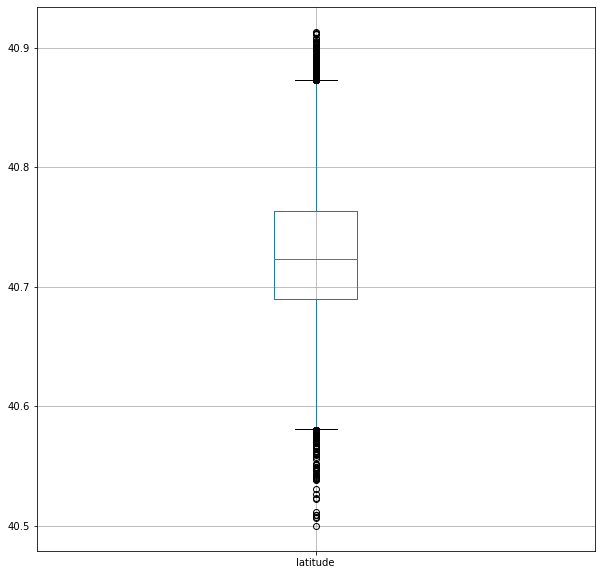

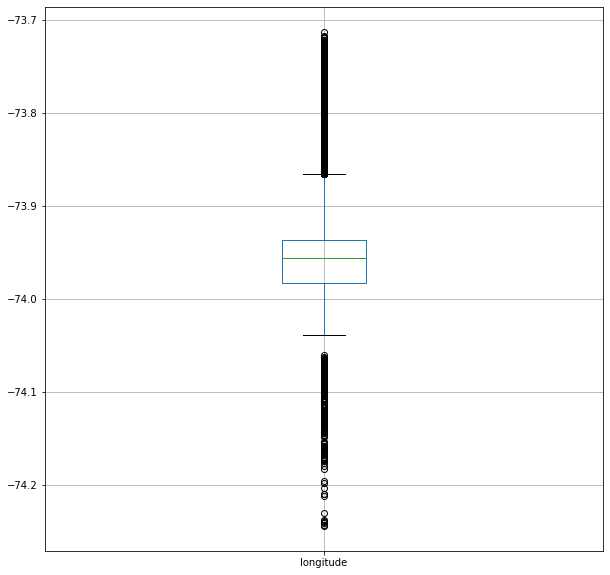

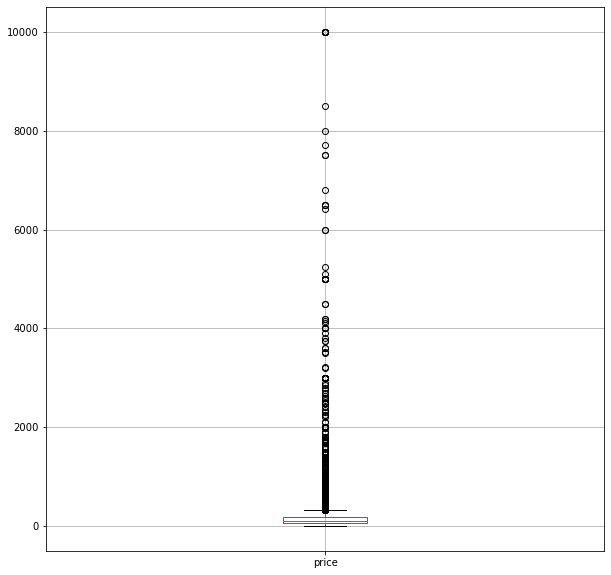

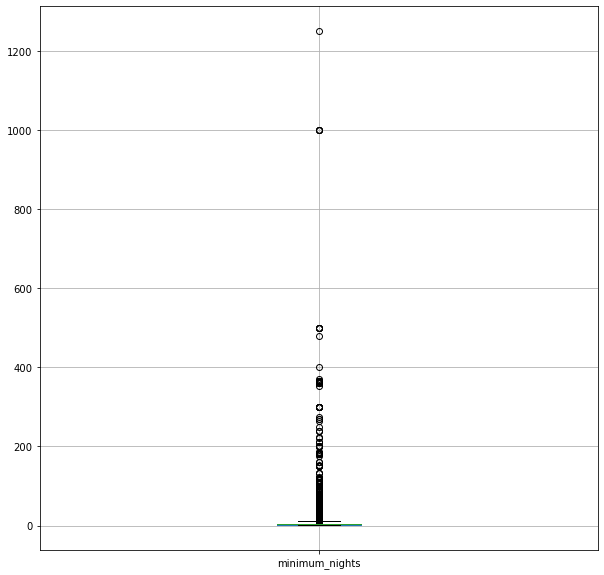

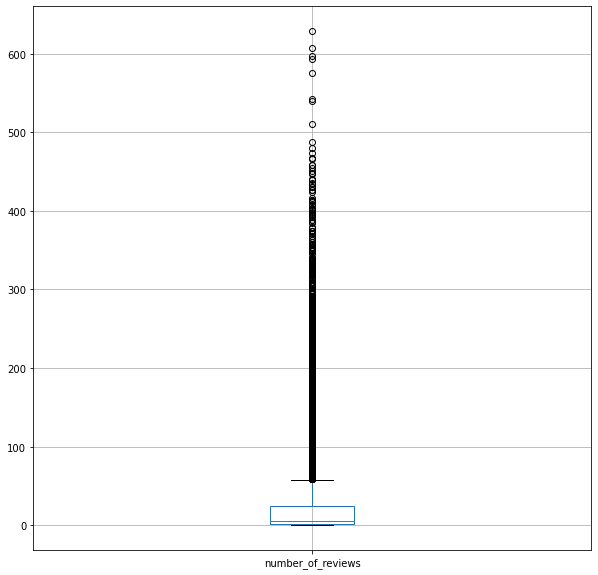

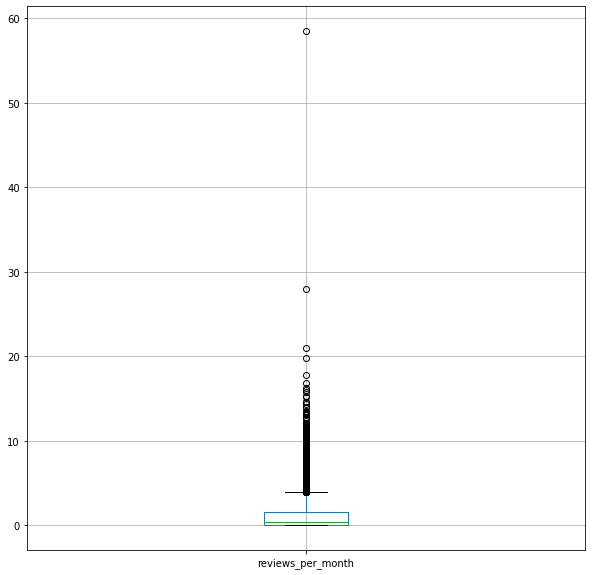

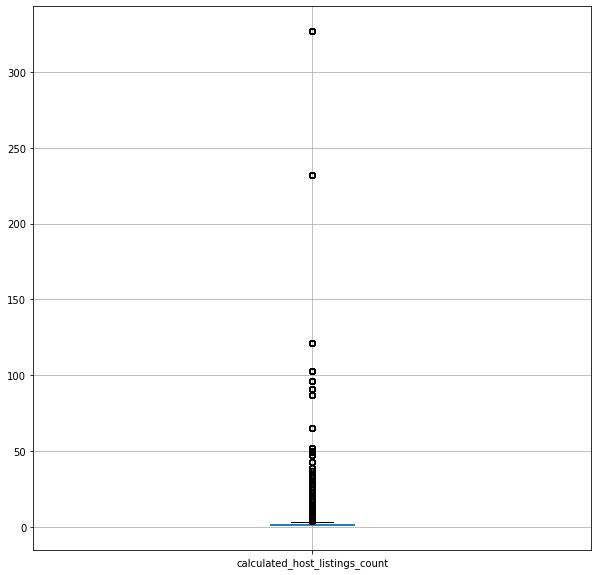

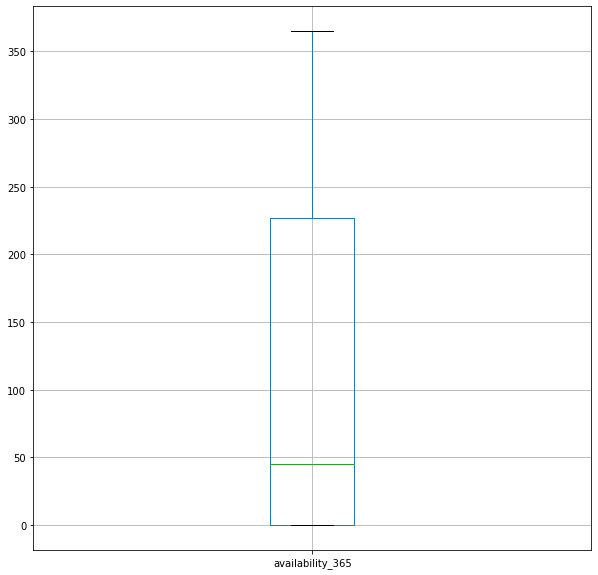

In [11]:
# Посмотрим чего там по выбросам:
columns = ['latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
for column in columns:
    plt.figure(figsize=(10,10))
    df.boxplot(column)

In [ ]:
# Думаю, что можно поработать с целевой переменной а так же с minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count
# Там есть явные выбросы, которые можно убрать

In [48]:
low = .05
high = .95
quant = df.quantile([low, high])
print(quant)

       latitude  longitude  price  minimum_nights  number_of_reviews  \
0.05  40.646114 -74.003880   40.0             1.0                0.0   
0.95  40.825643 -73.865771  355.0            30.0              114.0   

      reviews_per_month  calculated_host_listings_count  availability_365  
0.05               0.00                             1.0               0.0  
0.95               4.31                            15.0             359.0  


In [49]:
df = df[df.price.between(quant.loc[low, 'price'], quant.loc[high, 'price'])]
df = df[df['minimum_nights'] < 200]
df = df[df['calculated_host_listings_count'] < 50]
df = df[df['number_of_reviews'] < 500]
df = df[df['reviews_per_month'] < 20]
df = df[df['calculated_host_listings_count'] < 50]
df.shape

(43144, 11)

In [50]:
(48895 - 43144)/48895
# Потеряли 11 процентов данных, но они стали гораздо чище и наша модель будет работать лучше

0.11761938848553022

In [51]:
# Посмотрим чего там по ценам в зависимости от района
df.groupby('neighbourhood_group').mean()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,
Bronx,40.847929,-73.884689,86.116940,4.242623,27.277596,1.503366,2.088525,171.644809
Brooklyn,40.685580,-73.951490,111.710350,5.344146,24.990111,1.074444,2.000217,97.486390
Manhattan,40.767297,-73.973125,147.827250,6.643886,22.987003,1.025152,2.645781,95.630185
Queens,40.731819,-73.873170,95.678366,4.129288,28.392822,1.598350,2.369225,142.045608
Staten Island,40.610534,-74.107416,98.126984,3.901587,30.666667,1.636794,1.888889,192.241270


neighbourhood_group
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

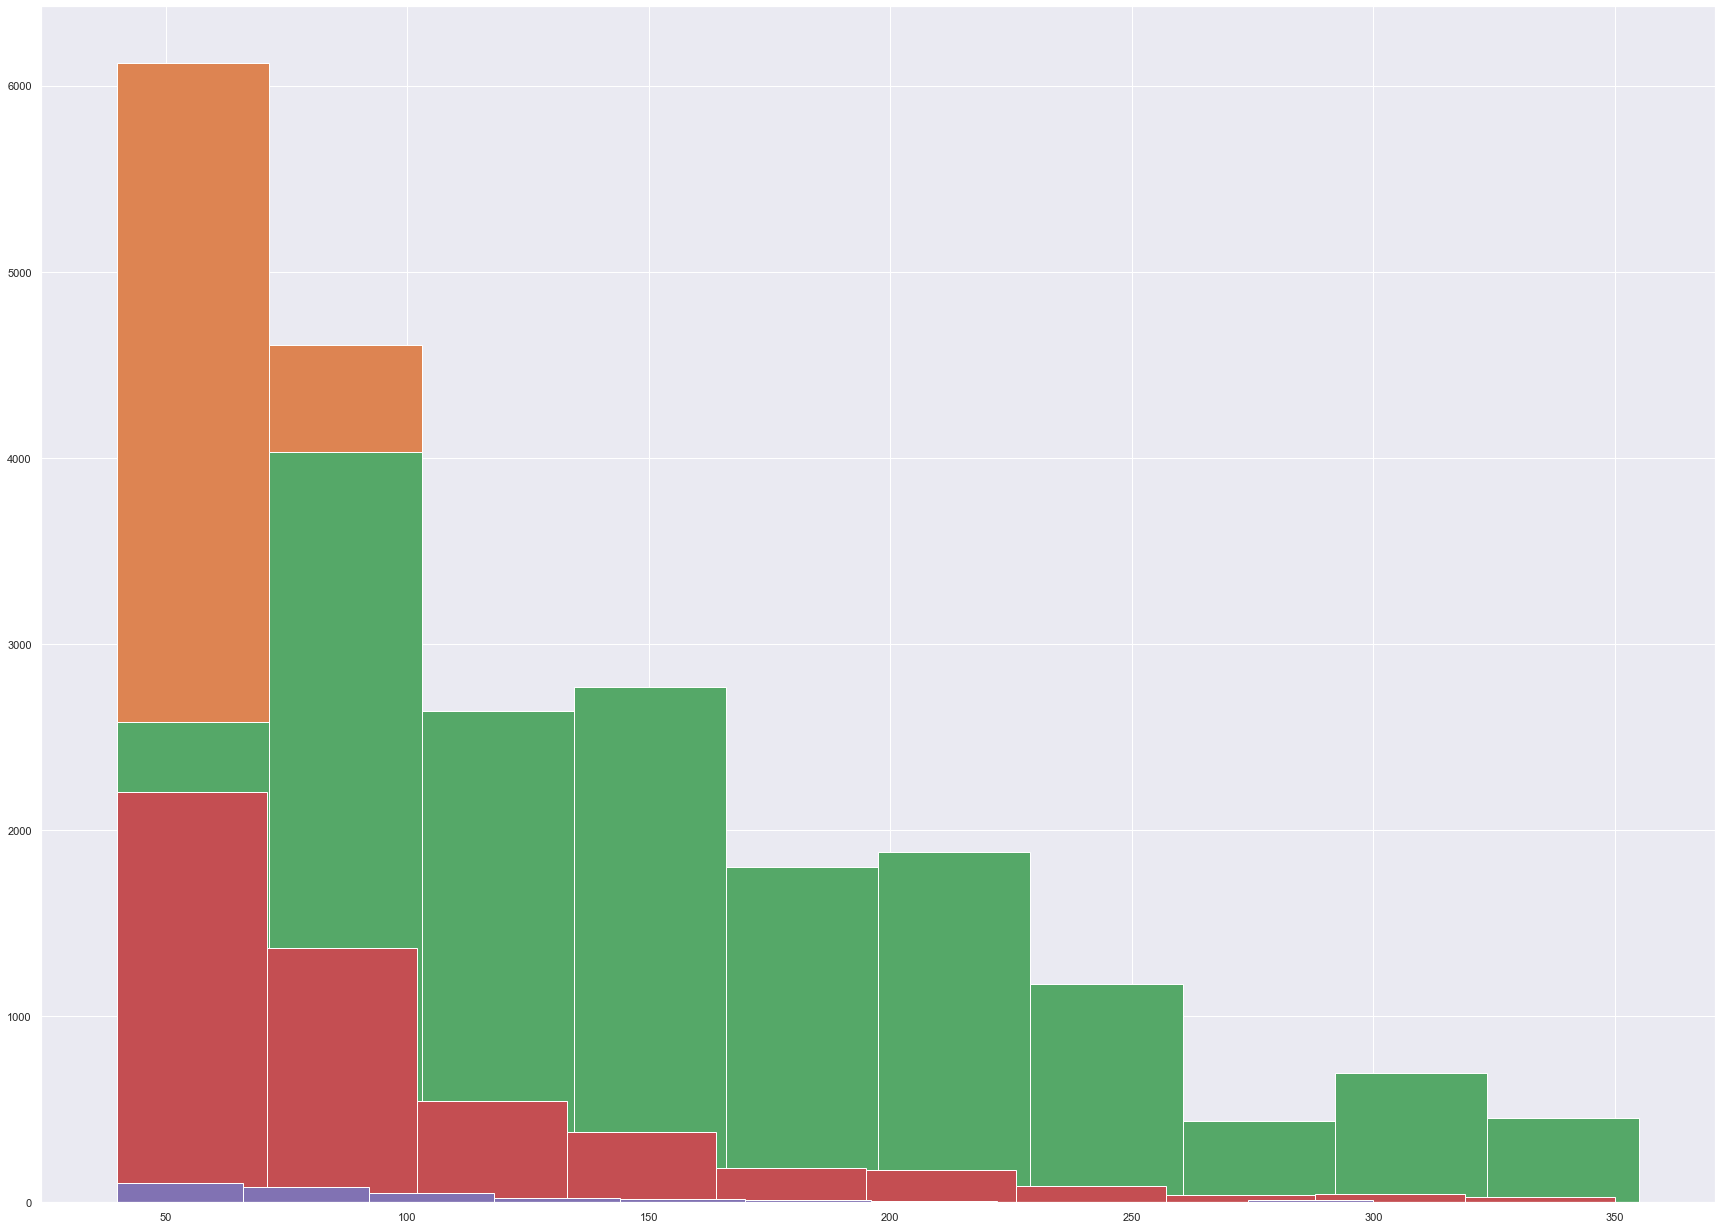

In [52]:
# Видно, что цена зависит от типа района. Manhattan — в среднем самый дорогой. Bronx — самый дешёвый и, похоже, самый злачный )
# Попробуем посмотреть эту зависимость на графике:
df.groupby('neighbourhood_group')['price'].hist()

<AxesSubplot:xlabel='price', ylabel='Count'>

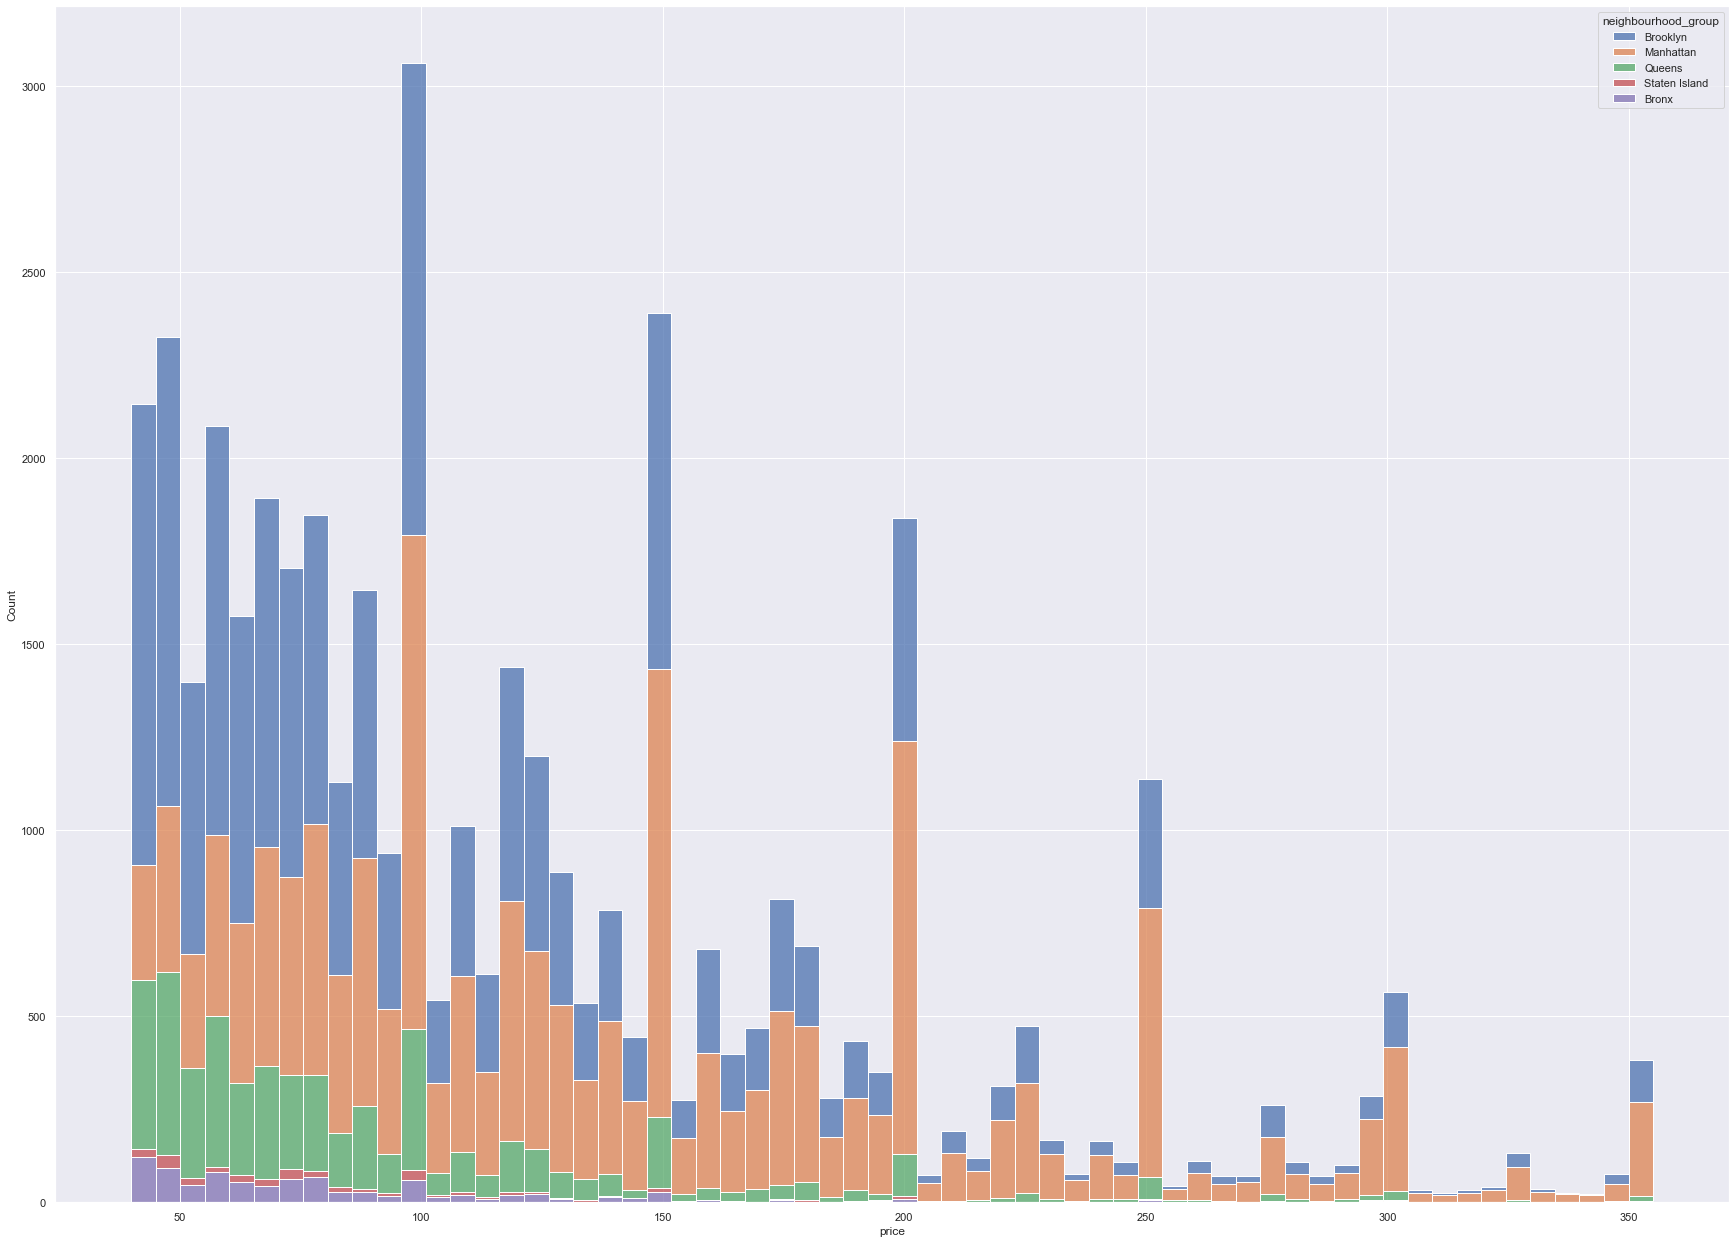

In [53]:
# Уже болле информативно. Попробуем через sns:
sns.histplot(data=df, x="price", hue="neighbourhood_group", multiple="stack")

In [ ]:
# Промежуточные выводы по районам:
#     1. В Brooklyn больше всего предложений.  Видимо, район самый большой, либо там высокая плотность застройки.
#     Цены на недвижимость в среднем дешевле, чем в Манхеттене и находятся на 2 месте.
#     2. В Manhattan недвижимость самая дорогая. Её чуть меньше чем в Бруклине. 
#     3. В Staten Island предложений меньше, чем в Queens, но средняя цена выше. Похоже на какой-то средний райончик. 
#     Скорее всего меньше по площади, чем остальные
#     4. Queens для тех, у кого не хватило денег на районы выше. Скорее всего не очень благополучный.
#     5. Ну и самый аутсайдер — Bronx. Жилья мало и оно самое дешёвое. Думаю, что это самый неблагополучный район

In [17]:
# Смотрим зависимость цен от типа комнат
df.groupby('room_type').mean()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,
Entire home/apt,40.727365,-73.957977,164.448440,6.833893,24.781925,1.099403,2.080401,97.066842
Private room,40.729885,-73.944124,83.126794,4.607369,24.673313,1.159043,2.562981,110.692323
Shared room,40.746261,-73.951248,80.619677,3.286344,17.807636,1.110103,2.841410,138.372981


<AxesSubplot:xlabel='price', ylabel='Count'>

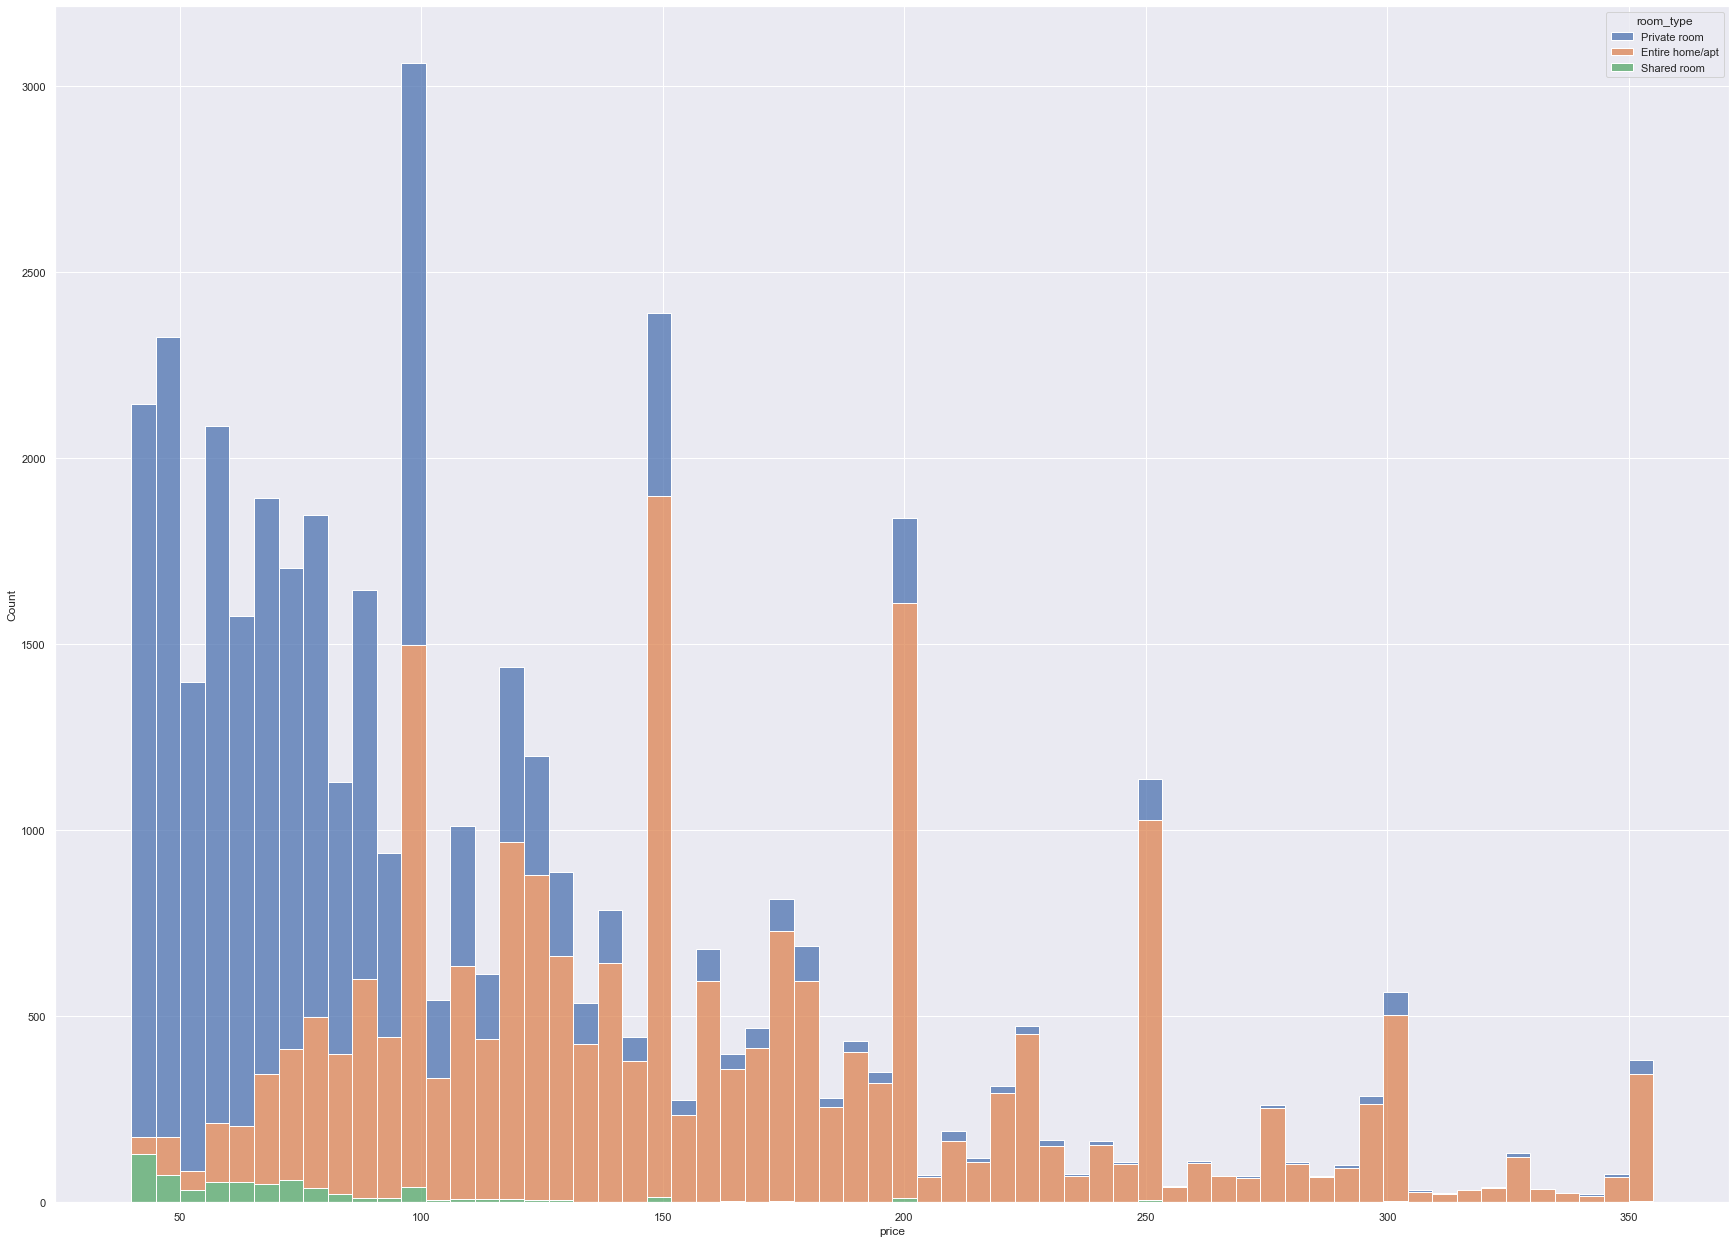

In [54]:
sns.histplot(data=df, x="price", hue="room_type", multiple="stack")

In [ ]:
# С типами комнат всё понятно.
#     1. Больше всего private room — самый популярный тип комнат. У них средняя цена.
#     2. Entire home — самые дорогие и на 2 месте по популярности
#     3. Shared room — самые доступные и дешёвые. Меньше всего предложений на рынке

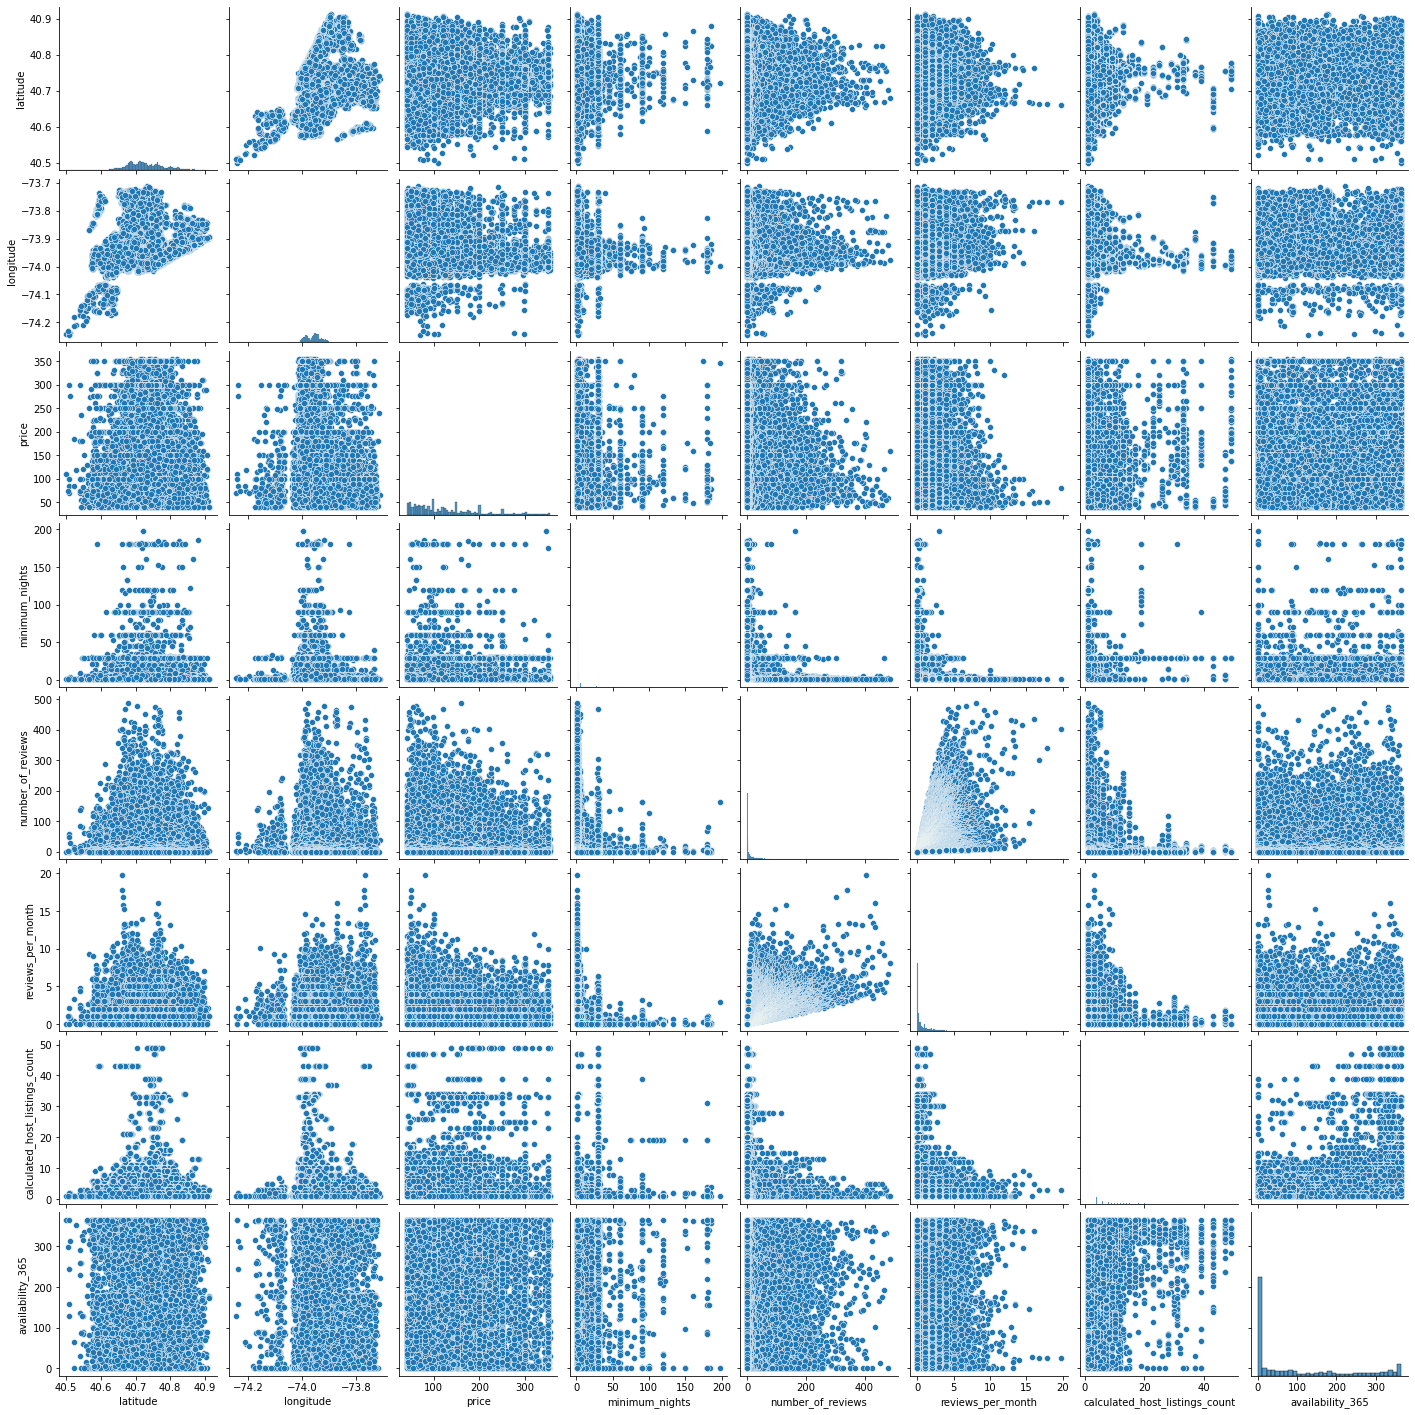

In [19]:
sns.pairplot(df[df.columns])

In [ ]:
# На пайрплоте не особо много интересной информации. Можно выделить несколько моментов:
#     1. Видна зависимость стоимости жилья и количества отзывов. Больше отзывов — дешевле аренда. 
#     Скорее всего это косвеная зависимость и в реальности чем дешевле жильё, тем чаще его снимают и как результат чаще оставляют отзыв.
#     2. Доступность 365 вообще никак не коррелирует с ценой. 
#     3. Очевидно, что есть зависимость цены от координат, но на данном графике она не раскрывается.

<AxesSubplot:>

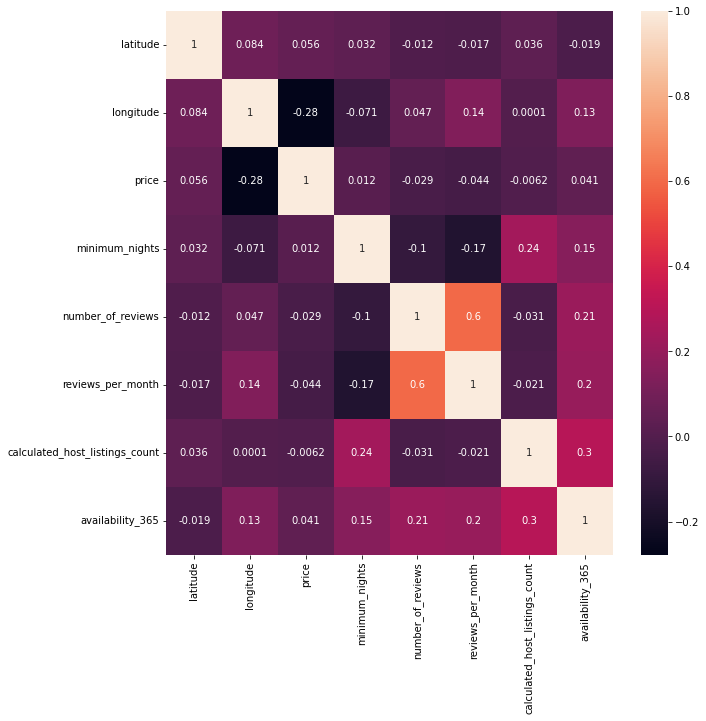

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns].corr(),annot=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

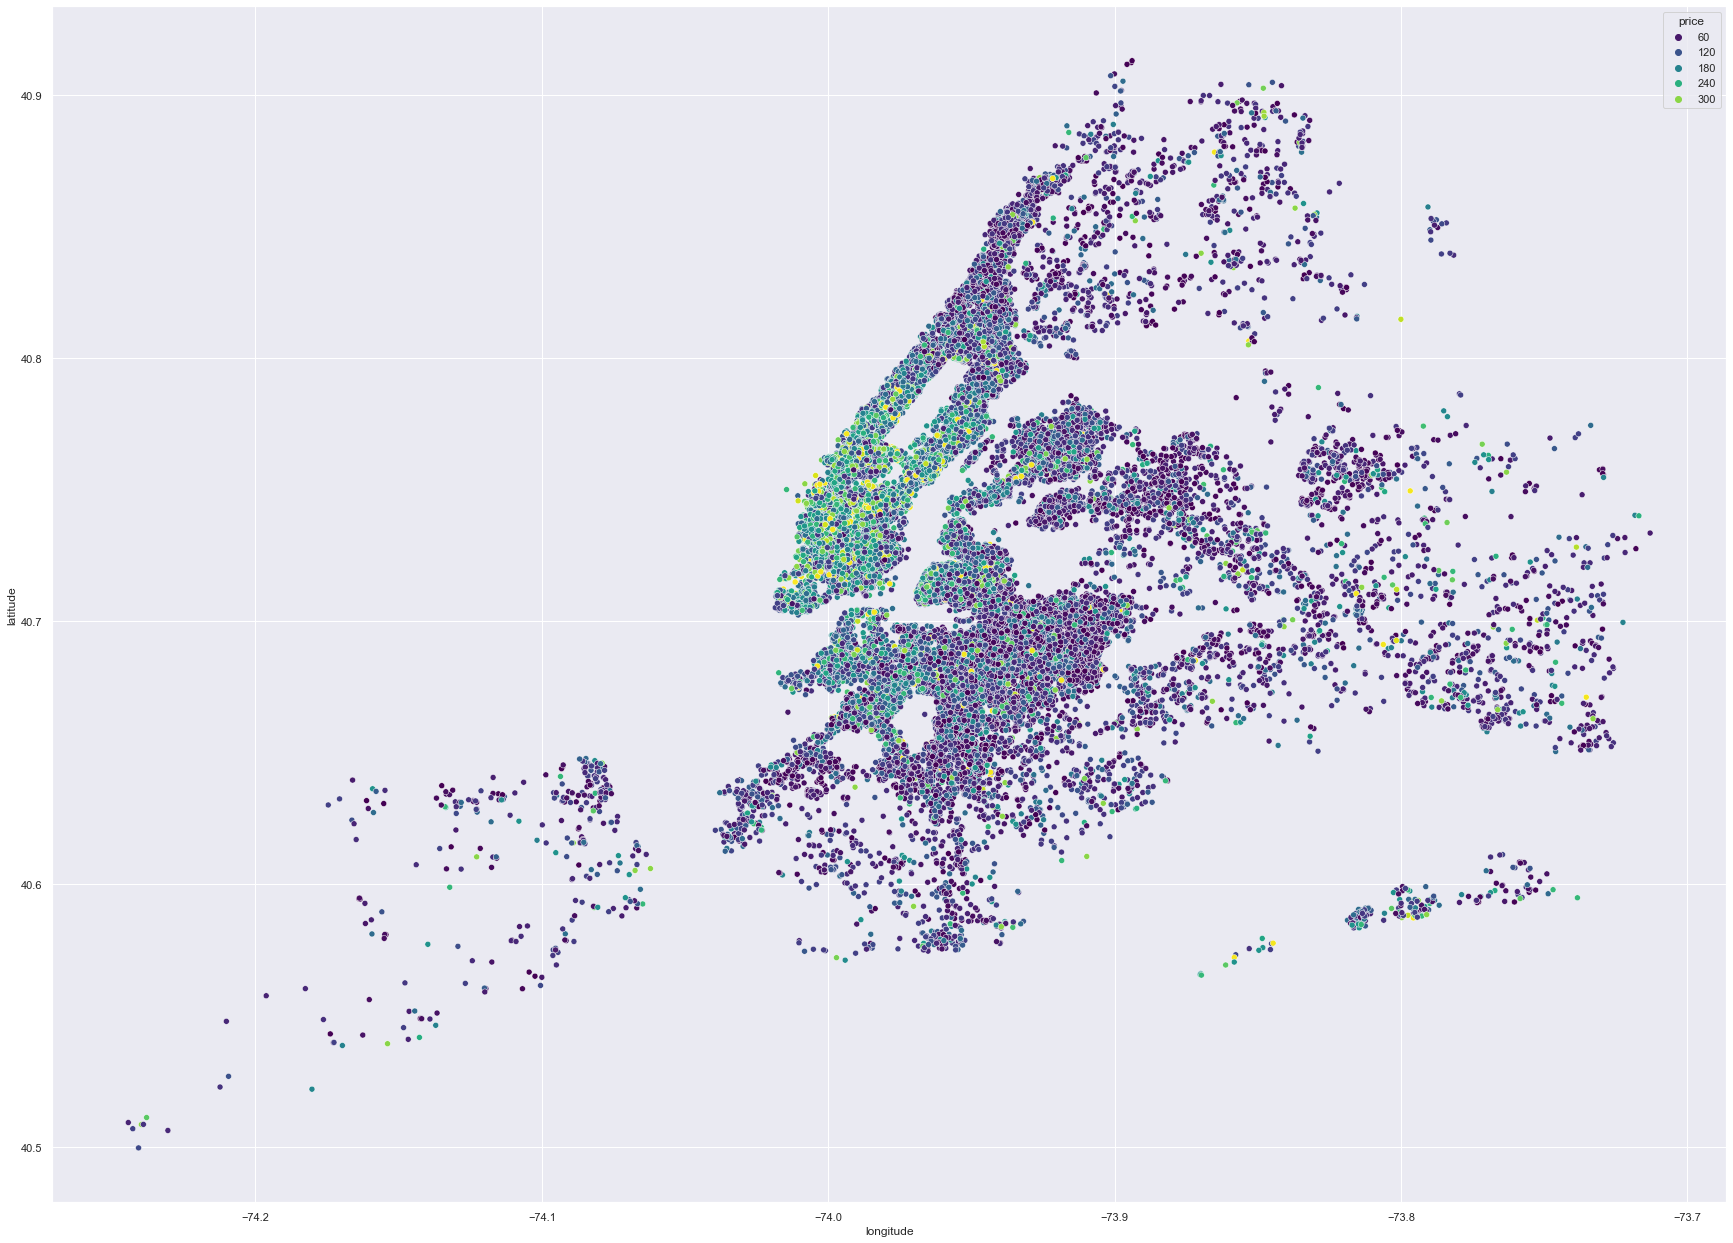

In [21]:
sns.set(rc = {'figure.figsize':(30,22)})
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price", palette='viridis')

In [ ]:
# Отличная иллюстрация того, как распределяется стоимость жилья в зависимости от координат. Видно, что манхеттен стамый дорогой район. 
# Даже central park видно )

In [22]:
# Преобразуем категориальные признаки neighbourhood_group, room_type в dummy
df = pd.get_dummies(df, columns = ['neighbourhood_group', 'room_type'], drop_first=True)

In [23]:
# Так как neighbourhood довольно большой категориальный признак, то попробуем его закодировать. 
# В качестве параметра будем использовать среднее значение стоимостьи категории
def mean_target_encoding(df, target, column):
    mean_enc = df.groupby(column)[target].mean()
    df[column+'_m_enc'] = df[column].map(mean_enc)
    return (df)

df = mean_target_encoding(df, 'price', 'neighbourhood')
df.drop(columns = ['neighbourhood'], axis =1, inplace=True)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood_m_enc
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0,92.285714
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0,189.364146
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0,107.739808
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0,128.574906
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0,116.150327


In [26]:
# Разделим целевую переменную и сами данные
data = df.drop('price', axis=1)
target = df.price

In [28]:
# Разделим данные на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=118)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30200, 14), (12944, 14), (30200,), (12944,))

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pipe_lr = Pipeline([('scaler', MinMaxScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', MinMaxScaler()), ('ridgeCV', RidgeCV())])
pipe_lasso = Pipeline([('scaler', MinMaxScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', MinMaxScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results0 = {'R2':[], 'MAE': [], 'MSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results0['R2'].append(r2_score(y_test, preds))
    results0['MAE'].append(mean_absolute_error(y_test, preds))
    results0['MSE'].append(mean_squared_error(y_test, preds))

res = pd.DataFrame(results0, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,MSE
Linear,0.472355,36.560454,2552.655755
Ridge,0.472399,36.557778,2552.444298
Lasso,0.436290,37.959015,2727.132372
ElasticNetCV,0.436883,38.083763,2724.263685


In [30]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [31]:
import geopy.distance

# Добавим ещё один признак, для того, чтобы улучшить линейную зависимость. Признак расстрояния от самого дорогого района.

# Координаты точки центра манхеттена от которого будем изменять расстояние:
point = np.array([-73.98968843762587, 40.7431614880428])

def make_a_dot(row):
    distance = geopy.distance.geodesic(point, [row['longitude'], row['latitude']]).km
    row['distance'] = distance
    return row

df_distance = df.apply(make_a_dot, axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_distance.drop('price', axis=1), df_distance.price, \
                                                    test_size=0.3, random_state=118)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30200, 15), (12944, 15), (30200,), (12944,))

In [32]:
df_distance.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,neighbourhood_m_enc,distance
count,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000,43144.000000
mean,40.728856,-73.951317,124.652791,5.724550,24.620457,1.127787,2.320717,104.164913,0.426595,0.428009,0.116888,0.007301,0.473090,0.015784,124.652791,5.185957
std,0.054906,0.045687,69.846220,11.276305,45.340948,1.586410,4.496799,127.426634,0.494588,0.494796,0.321290,0.085135,0.499281,0.124642,31.880445,4.528545
min,40.499790,-74.244420,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.022381
25%,40.689360,-73.981943,70.000000,1.000000,1.000000,0.050000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.439764,2.112587
50%,40.721980,-73.954710,100.000000,2.000000,6.000000,0.410000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.320846,4.372484
75%,40.763813,-73.936080,160.000000,4.000000,26.000000,1.670000,2.000000,194.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.933372,6.478831
max,40.913060,-73.712990,355.000000,198.000000,488.000000,19.750000,49.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,274.666667,30.882851


<AxesSubplot:xlabel='distance', ylabel='price'>

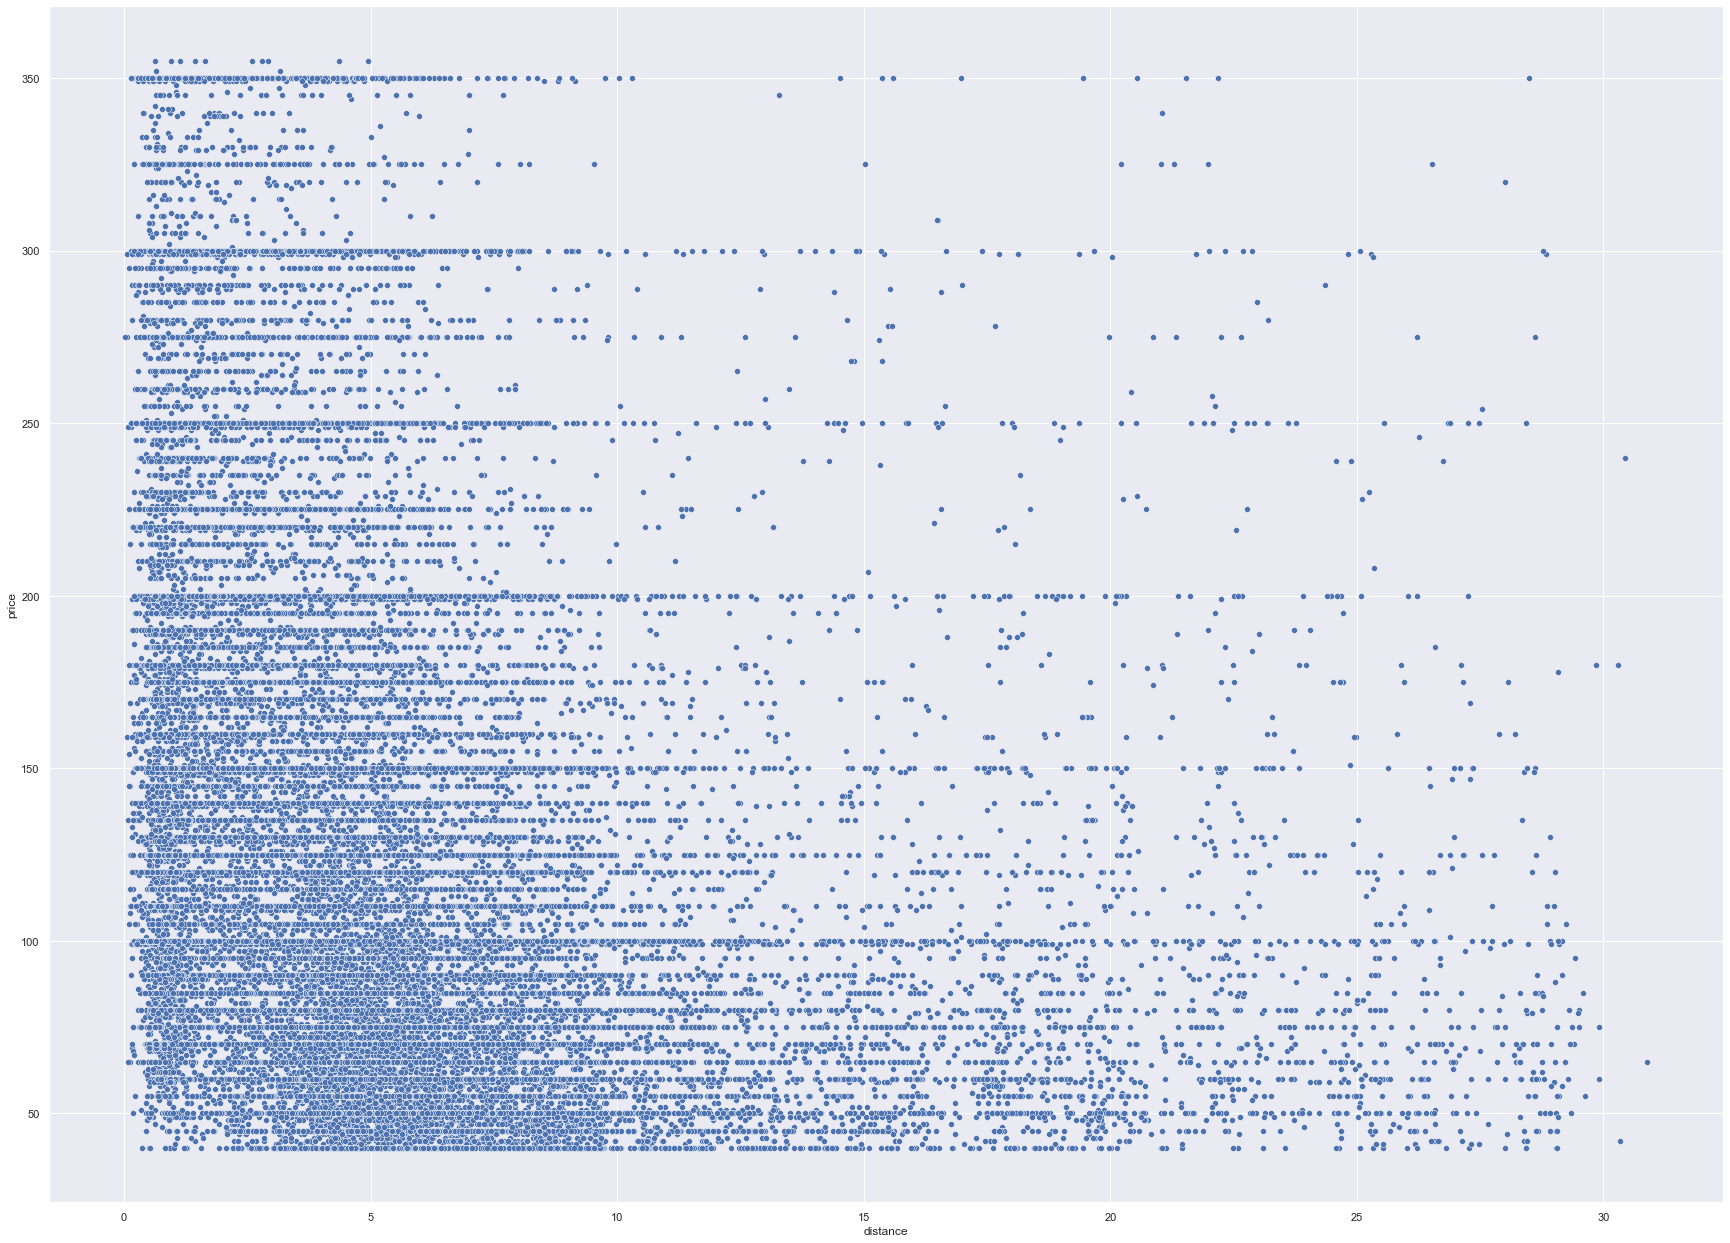

In [33]:
# проверим как выглядит зависимость цены от расстояния до центра
sns.scatterplot(data=df_distance, x="distance", y="price", palette='viridis')

In [ ]:
# Зависимость не линейная, конечно, но, возможно, улучшит показания модели. Проверим:

In [34]:
pipe_lr = Pipeline([('scaler', MinMaxScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', MinMaxScaler()), ('ridgeCV', RidgeCV())])
pipe_lasso = Pipeline([('scaler', MinMaxScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', MinMaxScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results0 = {'R2':[], 'MAE': [], 'MSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results0['R2'].append(r2_score(y_test, preds))
    results0['MAE'].append(mean_absolute_error(y_test, preds))
    results0['MSE'].append(mean_squared_error(y_test, preds))

res = pd.DataFrame(results0, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,MSE
Linear,0.472924,36.535714,2549.906466
Ridge,0.472951,36.534152,2549.774734
Lasso,0.436290,37.959015,2727.132372
ElasticNetCV,0.439461,37.972064,2711.793874


In [ ]:
# Стало лучше, но не сильно
# Попробуем ещё какой-нибудь алгоритм обучения. К примеру рэндом форест:

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10, n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)
preds_rfr = rfr.predict(X_test)

print('R2', r2_score(y_test, preds_rfr))
print('MAE', mean_absolute_error(y_test, preds_rfr))
print('MSE', mean_squared_error(y_test, preds_rfr))

R2 0.5195213373662587
MAE 34.25263582050365
MSE 2324.4740923985905


In [37]:
# Хорошо! На данном этапе это самый лучший результат. Думаю, что можно так и оставить.
# В целом показатель не очень высокий, но я думаю, что это уже обусловненно исходными данными. 
# Если в данных было больше информации о самой квартире (площадь, этажностьи и т.д), томожно было более чётко предсказать цену